In [68]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Caminho do arquivo único
caminho_arquivo = r"C:\Users\Lucas\Documents\Coding\analise_duracao_spotify\data\processed\spotify_detalhes_limpo.csv"

# Leitura do arquivo
df = pd.read_csv(caminho_arquivo)

In [69]:
df.head()

,track_id,name,artists,album,release_date,duration_ms,explicit,popularity,release_year,duration_min,categoria_duracao
0,3hIFGEywPETgcaxrTTt2lD,Falei pra Elas,MC G15,Falei pra Elas,2016-10-06,226185,True,0,2016,3.769750,média
1,6DNtNfH8hXkqOX1sjqmI7p,Cold Water (feat. Justin Bieber & MØ),"Major Lazer, Justin Bieber, MØ",Cold Water (feat. Justin Bieber & MØ),2016-07-22,185351,False,3,2016,3.089183,média
2,3NdDpSvN911VPGivFlV5d0,I Don’t Wanna Live Forever (Fifty Shades Darker),"ZAYN, Taylor Swift",I Don’t Wanna Live Forever (Fifty Shades Darker),2016-12-09,245200,False,2,2016,4.086667,longa
3,4RuvPSCJ7xvRVOxiFBUt9B,Tchuk Tchuk,"Mc Gui, MC THD",Tchuk Tchuk,2016-10-07,195685,False,0,2016,3.261417,média
4,4owo0j5bw45IqiHxsTzcd6,Amei Te Ver,TIAGO IORC,Troco Likes,2015-07-10,257847,False,63,2015,4.297450,longa


In [70]:
# Força a conversão para datetime
df["release_date"] = pd.to_datetime(df["release_date"], format="%Y-%m-%d", errors="coerce")

# Confirmação do tipo da coluna
print(df["release_date"].dtype)

datetime64[ns]


In [71]:
df.dtypes

track_id                     object
name                         object
artists                      object
album                        object
release_date         datetime64[ns]
duration_ms                   int64
explicit                       bool
popularity                    int64
release_year                  int64
duration_min                float64
categoria_duracao            object
dtype: object

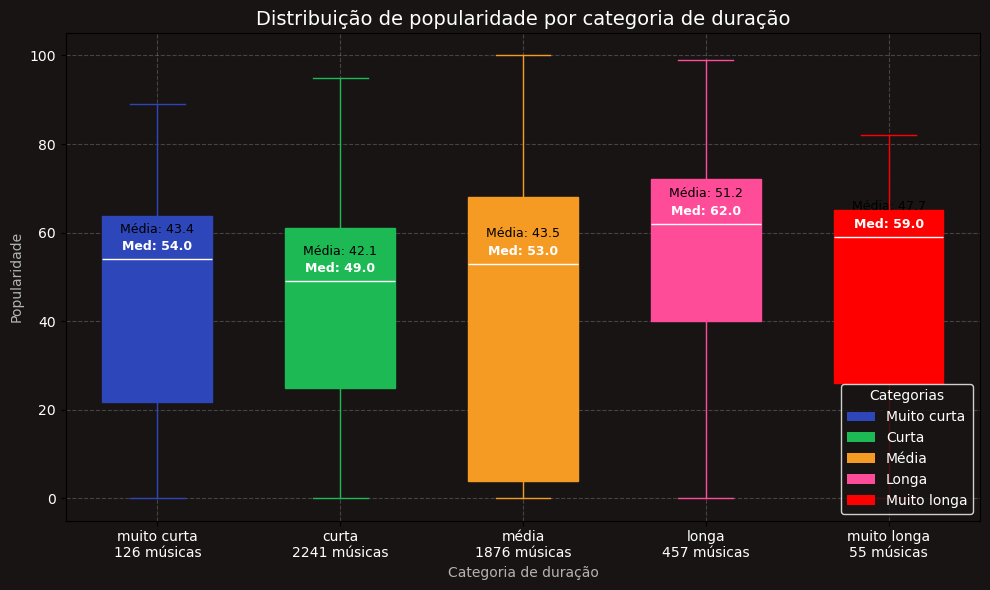

In [72]:
from matplotlib.patches import Patch

# Ordenação e categorização
ordem = ["muito curta", "curta", "média", "longa", "muito longa"]
df['categoria_duracao'] = pd.Categorical(df['categoria_duracao'], categories=ordem, ordered=True)

# Contagem de faixas por categoria para rótulo
contagem = df['categoria_duracao'].value_counts().reindex(ordem)
rotulos = [
    f"{cat}\n{contagem[cat]} música" + ("s" if contagem[cat] != 1 else "")
    for cat in ordem
]

# Cores específicas por categoria
cores = {
    "muito curta": "#2D46B9",   # azul
    "curta": "#1DB954",         # verde
    "média": "#F59B23",         # laranja
    "longa": "#FF4C99",         # rosa
    "muito longa": "#FF0000"    # vermelho
}

# Figura
plt.figure(figsize=(10, 6), facecolor="#191414")

# Desenha boxplots por categoria
for i, cat in enumerate(ordem):
    dados = df[df['categoria_duracao'] == cat]['popularity']
    plt.boxplot(
        dados,
        positions=[i + 1],
        widths=0.6,
        patch_artist=True,
        boxprops=dict(facecolor=cores[cat], color=cores[cat]),
        medianprops=dict(color="white"),
        whiskerprops=dict(color=cores[cat]),
        capprops=dict(color=cores[cat]),
        flierprops=dict(markerfacecolor=cores[cat], marker='o', alpha=0.5)
    )

    # Mediana (em branco)
    mediana = dados.median()
    plt.text(
        x=i + 1,
        y=mediana + 2,
        s=f"Med: {mediana:.1f}",
        color="white",
        ha='center',
        fontsize=9,
        fontweight='bold'
    )

    # Média (em preto)
    media = dados.mean()
    plt.text(
        x=i + 1,
        y=mediana + 6,
        s=f"Média: {media:.1f}",
        color="black",
        ha='center',
        fontsize=9
    )

# Títulos e eixos
plt.title("Distribuição de popularidade por categoria de duração", color="white", fontsize=14)
plt.xticks(ticks=range(1, len(ordem)+1), labels=rotulos, color="white")
plt.yticks(color="white")
plt.xlabel("Categoria de duração", color="#B3B3B3")
plt.ylabel("Popularidade", color="#B3B3B3")
plt.gca().set_facecolor("#191414")
plt.grid(True, linestyle="--", alpha=0.3)

# Legenda no canto inferior direito
legenda = [Patch(facecolor=cores[cat], label=cat.capitalize()) for cat in ordem]
leg = plt.legend(
    handles=legenda,
    title="Categorias",
    facecolor="#191414",
    edgecolor="white",
    labelcolor="white",
    fontsize=10,
    loc="lower right"
)
leg.get_title().set_color('white')

# Salvar
plt.tight_layout()
plt.savefig("../outputs/boxplot_popularidade_por_categoria_duracao.png", facecolor="#191414", dpi=300)
plt.show()


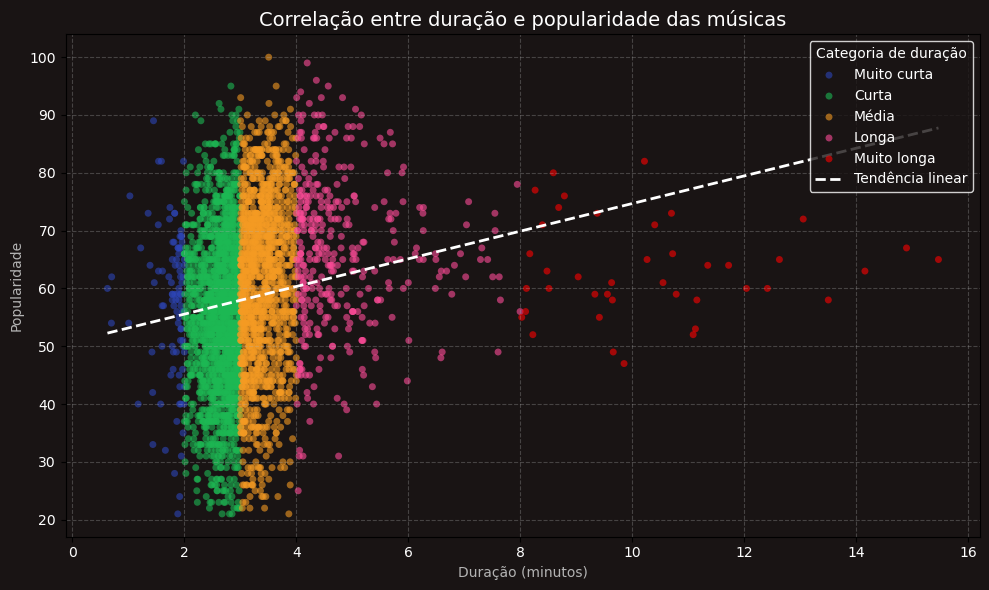

In [73]:
# Filtra músicas com popularidade > 2020
df_scatter = df[df['popularity'] > 20].copy()

# Garante categorias ordenadas
ordem = ["muito curta", "curta", "média", "longa", "muito longa"]
df_scatter['categoria_duracao'] = pd.Categorical(df_scatter['categoria_duracao'], categories=ordem, ordered=True)

# Cores por categoria
cores = {
    "muito curta": "#2D46B9",   # azul
    "curta": "#1DB954",         # verde
    "média": "#F59B23",         # laranja
    "longa": "#FF4C99",         # rosa
    "muito longa": "#FF0000"    # vermelho
}

# Figura
plt.figure(figsize=(10, 6), facecolor="#191414")

# Scatterplot por categoria
for cat in ordem:
    subset = df_scatter[df_scatter['categoria_duracao'] == cat]
    plt.scatter(
        subset['duration_min'],
        subset['popularity'],
        label=cat.capitalize(),
        color=cores[cat],
        alpha=0.6,
        edgecolor='none',
        s=25
    )

# Regressão linear (usando todos os pontos)
x = df_scatter['duration_min']
y = df_scatter['popularity']
coef = np.polyfit(x, y, 1)
trendline = np.poly1d(coef)
x_vals = np.linspace(x.min(), x.max(), 100)
plt.plot(x_vals, trendline(x_vals), color="white", linestyle="--", linewidth=2, label="Tendência linear")

# Estilo
plt.title("Correlação entre duração e popularidade das músicas", color="white", fontsize=14)
plt.xlabel("Duração (minutos)", color="#B3B3B3")
plt.ylabel("Popularidade", color="#B3B3B3")
plt.xticks(color="white")
plt.yticks(color="white")
plt.grid(True, linestyle="--", alpha=0.3)
plt.gca().set_facecolor("#191414")

# Legenda
leg = plt.legend(title="Categoria de duração", loc="upper right", facecolor="#191414", edgecolor="white", labelcolor="white")
leg.get_title().set_color("white")

# Salvar
plt.tight_layout()
plt.savefig("../outputs/scatterplot_duracao_vs_popularidade.png", facecolor="#191414", dpi=300)
plt.show()


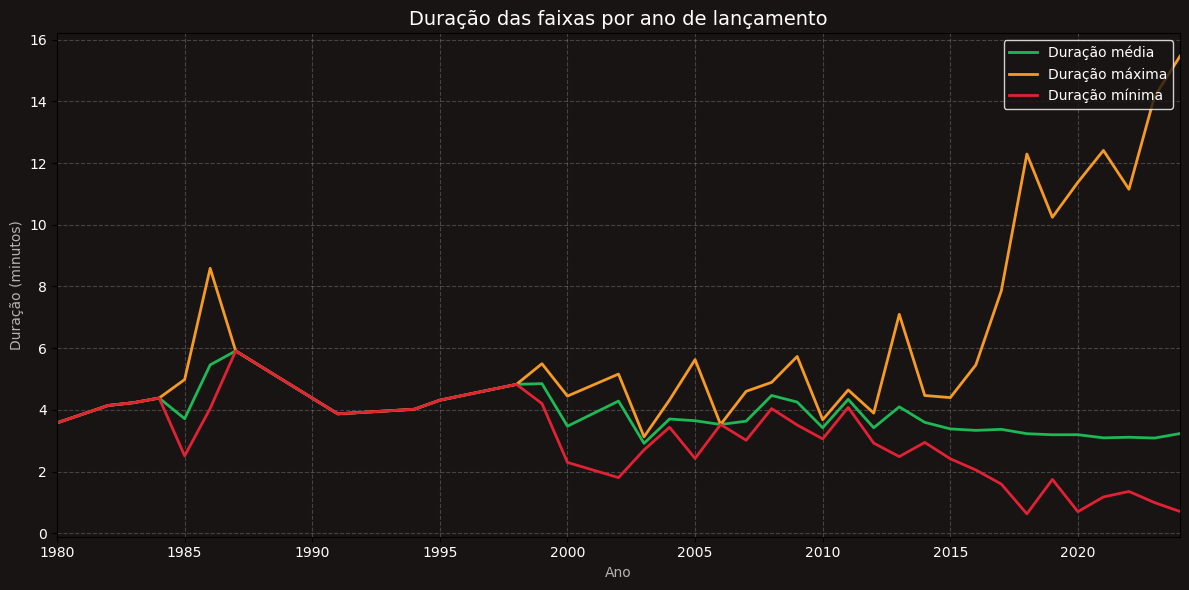

In [74]:
# Filtra dados válidos
df_linha = df.dropna(subset=["release_year", "duration_min"]).copy()
df_linha = df_linha[df_linha['release_year'].between(1900, 2100)]

# Agrupamentos por ano
media = df_linha.groupby("release_year")["duration_min"].mean()
maximo = df_linha.groupby("release_year")["duration_min"].max()
minimo = df_linha.groupby("release_year")["duration_min"].min()

# Figura
plt.figure(figsize=(12, 6), facecolor="#191414")

# Linhas
plt.plot(media.index, media.values, label="Duração média", color="#1DB954", linewidth=2)
plt.plot(maximo.index, maximo.values, label="Duração máxima", color="#F59B23", linewidth=2)
plt.plot(minimo.index, minimo.values, label="Duração mínima", color="#E22134", linewidth=2)

# Eixo X a partir de 1980
plt.xlim(1980, media.index.max())

# Estilo
plt.title("Duração das faixas por ano de lançamento", color="white", fontsize=14)
plt.xlabel("Ano", color="#B3B3B3")
plt.ylabel("Duração (minutos)", color="#B3B3B3")
plt.xticks(color="white")
plt.yticks(color="white")
plt.grid(True, linestyle="--", alpha=0.3)
plt.gca().set_facecolor("#191414")

# Legenda
leg = plt.legend(facecolor="#191414", edgecolor="white", labelcolor="white", loc="upper right")
leg.get_title().set_color("white")

# Salvar
plt.tight_layout()
plt.savefig("../outputs/linha_duracao_por_ano.png", facecolor="#191414", dpi=300)
plt.show()



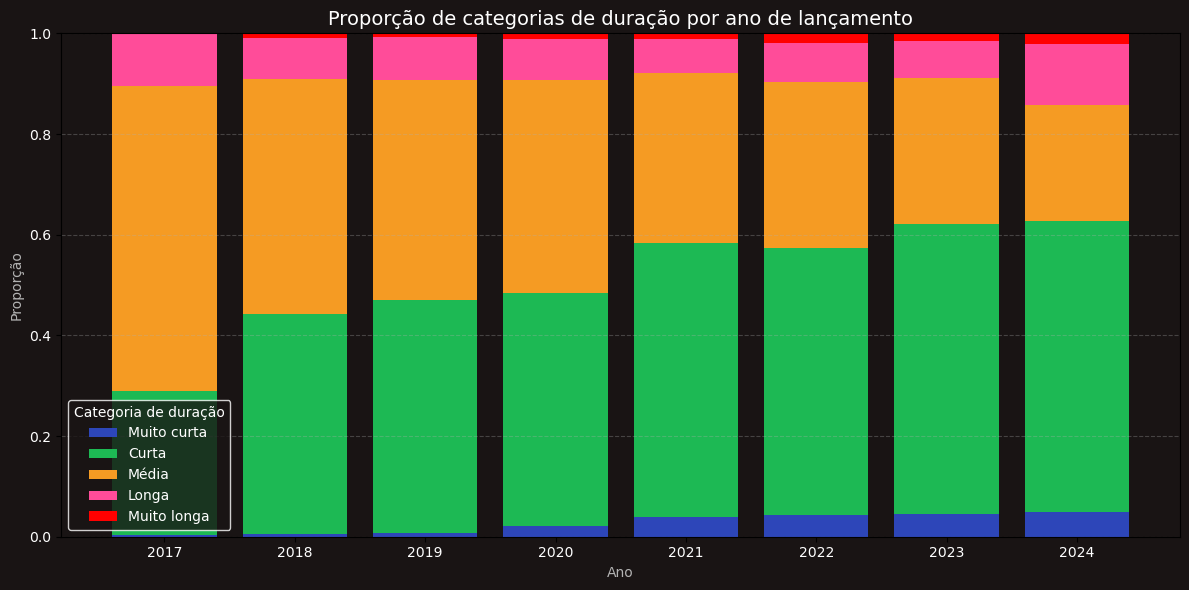

In [75]:
# Filtra dados válidos e com anos desejados
df_barras = df.dropna(subset=["release_year", "categoria_duracao"]).copy()
df_barras = df_barras[df_barras["release_year"].between(2017, 2024)]

# Garante categorias ordenadas
ordem = ["muito curta", "curta", "média", "longa", "muito longa"]
df_barras['categoria_duracao'] = pd.Categorical(df_barras['categoria_duracao'], categories=ordem, ordered=True)

# Agrupamento por ano e categoria
proporcoes = (
    df_barras.groupby(["release_year", "categoria_duracao"], observed=False)
    .size()
    .unstack(fill_value=0)
    .apply(lambda x: x / x.sum(), axis=1)  # Converte para proporção por ano
)

# Cores consistentes
cores = {
    "muito curta": "#2D46B9",   # azul
    "curta": "#1DB954",         # verde
    "média": "#F59B23",         # laranja
    "longa": "#FF4C99",         # rosa
    "muito longa": "#FF0000"    # vermelho
}

# Criação do gráfico
plt.figure(figsize=(12, 6), facecolor="#191414")
bottom = [0] * len(proporcoes)

for cat in ordem:
    plt.bar(
        proporcoes.index,
        proporcoes[cat],
        bottom=bottom,
        color=cores[cat],
        label=cat.capitalize()
    )
    bottom = [i + j for i, j in zip(bottom, proporcoes[cat])]

# Estilo
plt.title("Proporção de categorias de duração por ano de lançamento", color="white", fontsize=14)
plt.xlabel("Ano", color="#B3B3B3")
plt.ylabel("Proporção", color="#B3B3B3")
plt.xticks(proporcoes.index, color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#191414")
plt.grid(axis="y", linestyle="--", alpha=0.3)

# Legenda
leg = plt.legend(title="Categoria de duração", facecolor="#191414", edgecolor="white", labelcolor="white")
leg.get_title().set_color("white")



# Salvar o gráfico
plt.tight_layout()
plt.savefig("../outputs/barras_empilhadas_proporcao_categorias_2017_2024.png", facecolor="#191414", dpi=300)
plt.show()


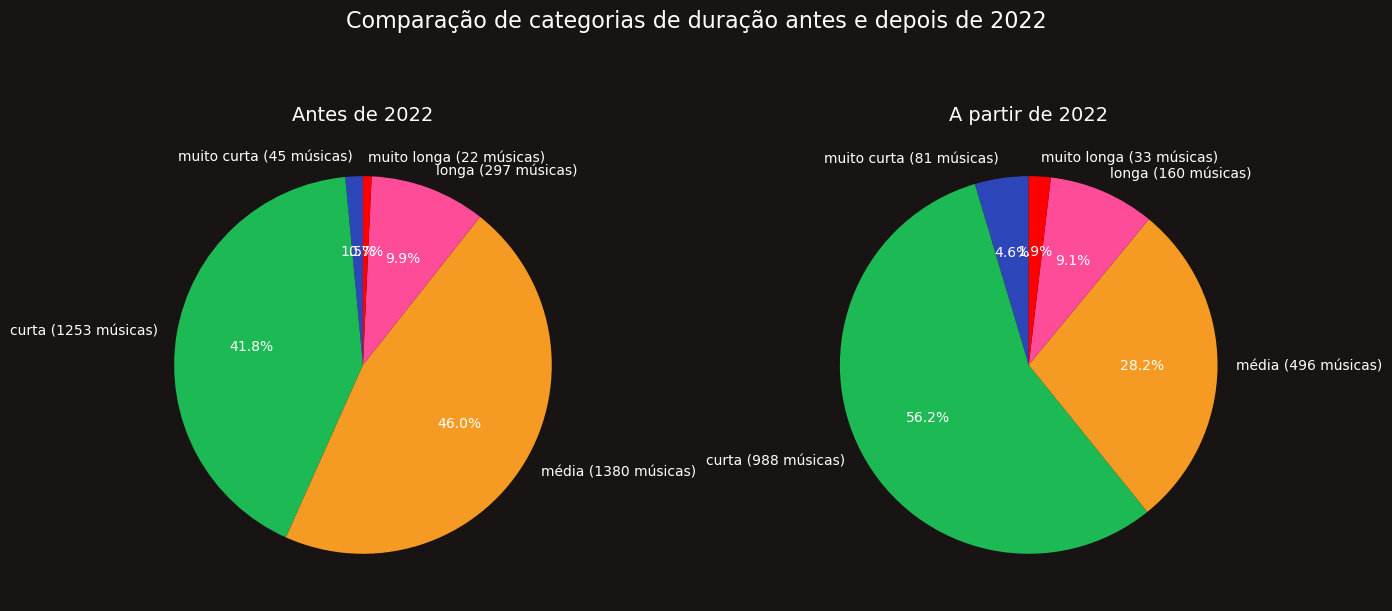

In [76]:
# Cores consistentes
cores = {
    "muito curta": "#2D46B9",   # azul
    "curta": "#1DB954",         # verde
    "média": "#F59B23",         # laranja
    "longa": "#FF4C99",         # rosa
    "muito longa": "#FF0000"    # vermelho
}

ordem = ["muito curta", "curta", "média", "longa", "muito longa"]

# Filtra os dois períodos
df_antes = df[df["release_year"] < 2022]
df_depois = df[df["release_year"] >= 2022]

# Conta por categoria
contagem_antes = df_antes["categoria_duracao"].value_counts().reindex(ordem, fill_value=0)
contagem_depois = df_depois["categoria_duracao"].value_counts().reindex(ordem, fill_value=0)
cores_lista = [cores[cat] for cat in ordem]

# Criação da figura com 2 gráficos de pizza
fig, axs = plt.subplots(1, 2, figsize=(14, 7), facecolor="#191414")

# Gráfico: antes de 2022
axs[0].pie(
    contagem_antes,
    labels=[f"{cat} ({contagem_antes[cat]} música" + ("s" if contagem_antes[cat] != 1 else "") + ")" for cat in ordem],
    colors=cores_lista,
    autopct="%1.1f%%",
    textprops={'color': 'white'},
    startangle=90
)
axs[0].set_title("Antes de 2022", color="white", fontsize=14)

# Gráfico: a partir de 2022
axs[1].pie(
    contagem_depois,
    labels=[f"{cat} ({contagem_depois[cat]} música" + ("s" if contagem_depois[cat] != 1 else "") + ")" for cat in ordem],
    colors=cores_lista,
    autopct="%1.1f%%",
    textprops={'color': 'white'},
    startangle=90
)
axs[1].set_title("A partir de 2022", color="white", fontsize=14)

plt.suptitle("Comparação de categorias de duração antes e depois de 2022", color="white", fontsize=16)
plt.tight_layout()
plt.savefig("../outputs/pizza_comparacao_antes_depois_2022.png", facecolor="#191414", dpi=300)
plt.show()


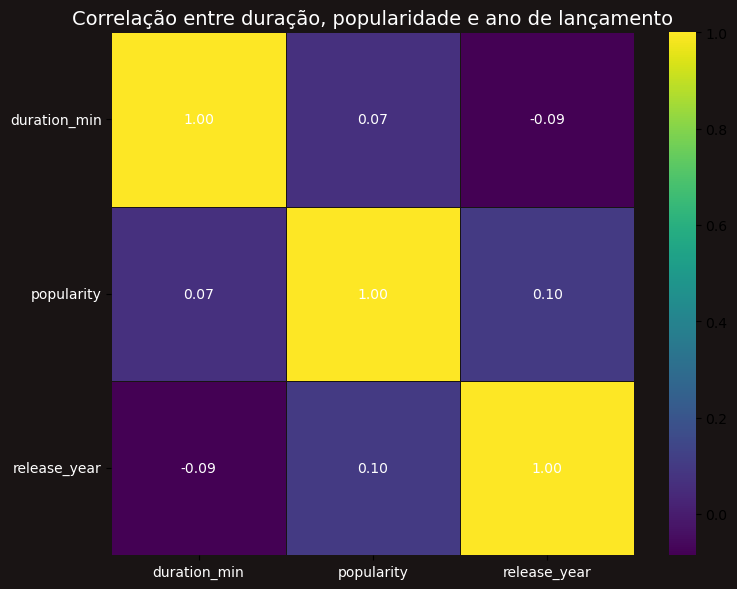

In [77]:


# Seleciona as colunas e remove valores ausentes
df_corr = df[["duration_min", "popularity", "release_year"]].dropna()

# Calcula a matriz de correlação
correlacoes = df_corr.corr(numeric_only=True)

# Criação do heatmap com estilo Spotify
plt.figure(figsize=(8, 6), facecolor="#191414")
sns.heatmap(
    correlacoes,
    annot=True,
    fmt=".2f",
    cmap="viridis",
    cbar=True,
    square=True,
    linewidths=0.5,
    linecolor="#191414",
    annot_kws={"color": "white"},
)

# Estética do gráfico
plt.title("Correlação entre duração, popularidade e ano de lançamento", color="white", fontsize=14)
plt.xticks(color="white")
plt.yticks(color="white", rotation=0)
plt.gca().set_facecolor("#191414")

# Salvar
plt.tight_layout()
plt.savefig("../outputs/heatmap_correlacoes_duracao_popularidade_ano.png", facecolor="#191414", dpi=300)
plt.show()


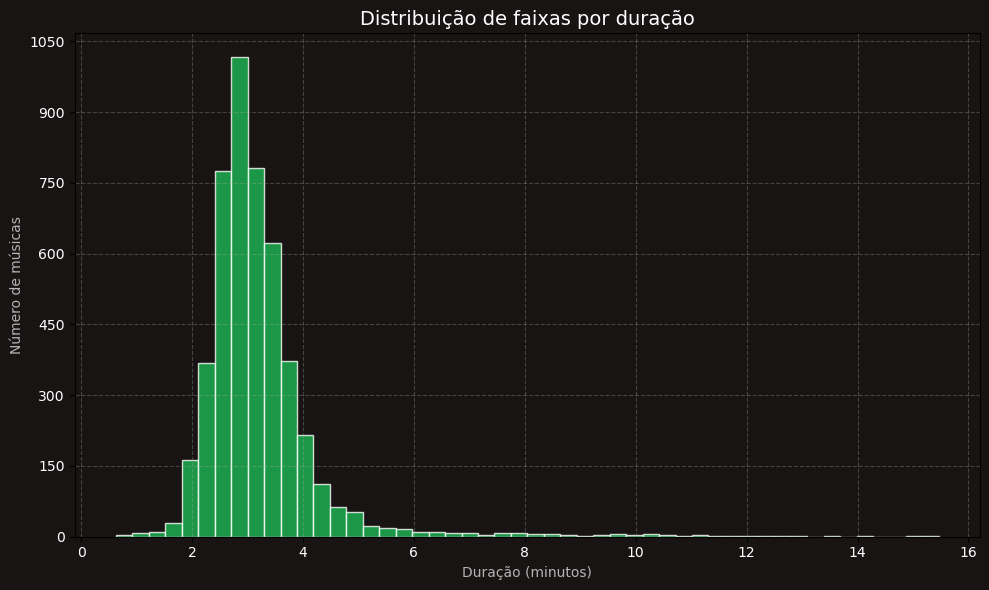

In [78]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Filtra valores válidos
df_hist = df.dropna(subset=["duration_min"]).copy()

# Criação da figura
plt.figure(figsize=(10, 6), facecolor="#191414")

# Histograma com contagem absoluta
contagens, bins, patches = plt.hist(
    df_hist["duration_min"],
    bins=50,
    color="#1DB954",
    edgecolor="white",
    alpha=0.8
)

# Estilo
plt.title("Distribuição de faixas por duração", color="white", fontsize=14)
plt.xlabel("Duração (minutos)", color="#B3B3B3")
plt.ylabel("Número de músicas", color="#B3B3B3")
plt.xticks(color="white")
plt.yticks(color="white")
plt.grid(True, linestyle="--", alpha=0.3)
plt.gca().set_facecolor("#191414")

# Força o eixo Y a mostrar apenas inteiros
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Salvar
plt.tight_layout()
plt.savefig("../outputs/histograma_contagem_duracao_y_inteiro.png", facecolor="#191414", dpi=300)
plt.show()


In [106]:
import matplotlib.patheffects
from matplotlib.colors import LinearSegmentedColormap, to_rgba

# Caminho de saída
pasta_saida = r"C:\Users\Lucas\Documents\Coding\analise_duracao_spotify\outputs"
os.makedirs(pasta_saida, exist_ok=True)

def formatar_duracao(minutos):
    if pd.isna(minutos):
        return ""
    total_segundos = int(round(minutos * 60))
    min = total_segundos // 60
    seg = total_segundos % 60
    return f"{min}min {seg}s"

def cortar_texto(texto, max_chars=45):
    texto = str(texto)
    return texto if len(texto) <= max_chars else texto[:max_chars - 3] + "..."

def desenhar_tabela_colorida(df, colunas, titulo, cores, nome_arquivo):
    fig, ax = plt.subplots(figsize=(12, 14))
    fig.patch.set_facecolor("#191414")
    ax.set_facecolor("#191414")
    ax.axis("off")

    # Pré-processamento
    df_formatado = df.copy()
    df_formatado["Música"] = df_formatado["Música"].apply(lambda x: cortar_texto(x, max_chars=45))
    df_formatado["Duração"] = df_formatado["Duração"].apply(formatar_duracao)

    # Cria tabela
    tabela = ax.table(
        cellText=df_formatado[colunas].values,
        colLabels=colunas,
        loc="center",
        cellLoc="left",
        colWidths=[0.75, 0.25],
        colColours=["black"] * len(colunas)
    )

    tabela.auto_set_font_size(False)
    tabela.set_fontsize(10)
    tabela.scale(1, 1.5)

    for (row, col), cell in tabela.get_celld().items():
        cell.set_text_props(weight="bold", color="white", fontsize=10)
        cell.get_text().set_path_effects([
            matplotlib.patheffects.Stroke(linewidth=0.8, foreground='black'),
            matplotlib.patheffects.Normal()
        ])
        if row == 0:
            cell.set_fontsize(12)
            cell.set_height(0.06)
        elif row > 0:
            cell.set_facecolor(cores[row - 1])
            if col == 1:  # coluna "Duração"
                cell._loc = 'center'  # centraliza o texto

    ax.set_title(
        titulo,
        fontsize=18,
        color="white",
        weight="bold",
        pad=30,
        loc="center"
    )

    plt.tight_layout()
    plt.savefig(nome_arquivo, dpi=300, bbox_inches="tight", facecolor="#191414")
    plt.close()

# ---------- Geração das tabelas ----------

# Top 25 mais longas
df_longas = (
    df.dropna(subset=["name", "artists", "duration_min"])
    .sort_values("duration_min", ascending=False)
    .head(25)
    .copy()
)
df_longas["Música"] = df_longas["name"].str.strip().str.title() + " - " + df_longas["artists"].str.strip().str.title()
df_longas["Duração"] = df_longas["duration_min"]
cmap_longas = LinearSegmentedColormap.from_list("rosa_laranja", ["#FF4C99", "#F59B23"])
cores_longas = [to_rgba(cmap_longas(i / 24), alpha=0.5) for i in range(25)]
desenhar_tabela_colorida(
    df_longas,
    ["Música", "Duração"],
    "Top 25 Músicas Mais Longas",
    cores_longas,
    os.path.join(pasta_saida, "top25_longas.png")
)

# Top 25 mais curtas
df_curtas = (
    df.dropna(subset=["name", "artists", "duration_min"])
    .sort_values("duration_min", ascending=True)
    .head(25)
    .copy()
)
df_curtas["Música"] = df_curtas["name"].str.strip().str.title() + " - " + df_curtas["artists"].str.strip().str.title()
df_curtas["Duração"] = df_curtas["duration_min"]
cmap_curtas = LinearSegmentedColormap.from_list("azul_verde", ["#2D46B9", "#1DB954"])
cores_curtas = [to_rgba(cmap_curtas(i / 24), alpha=0.5) for i in range(25)]
desenhar_tabela_colorida(
    df_curtas,
    ["Música", "Duração"],
    "Top 25 Músicas Mais Curtas",
    cores_curtas,
    os.path.join(pasta_saida, "top25_curtas.png")
)


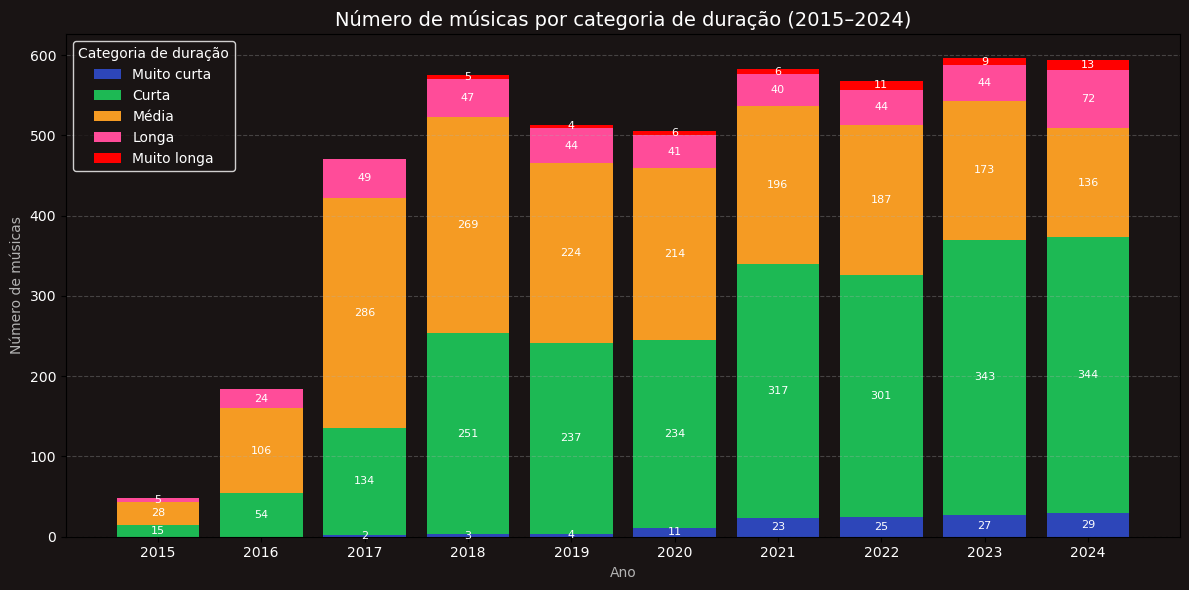

In [81]:
# Aplica categorias (certifique-se de que a função classificar_duracao está atualizada!)
def classificar_duracao(minutos):
    if minutos > 8:
        return "muito longa"
    elif minutos > 4:
        return "longa"
    elif minutos > 3:
        return "média"
    elif minutos > 2:
        return "curta"
    else:
        return "muito curta"

df["categoria_duracao"] = df["duration_min"].apply(classificar_duracao)

# Filtra anos de 2015 a 2024
df_contagem = df.dropna(subset=["release_year", "categoria_duracao"]).copy()
df_contagem = df_contagem[df_contagem["release_year"].between(2015, 2024)]

# Garante ordem categórica
ordem = ["muito curta", "curta", "média", "longa", "muito longa"]
df_contagem["categoria_duracao"] = pd.Categorical(df_contagem["categoria_duracao"], categories=ordem, ordered=True)

# Agrupa dados com observed=False para manter todas as categorias
contagem = df_contagem.groupby(["release_year", "categoria_duracao"], observed=False).size().unstack(fill_value=0)
contagem = contagem.reindex(range(2015, 2025), fill_value=0)  # garante anos ausentes com zero

# Cores por categoria
cores = {
    "muito curta": "#2D46B9",   # azul
    "curta": "#1DB954",         # verde
    "média": "#F59B23",         # laranja
    "longa": "#FF4C99",         # rosa
    "muito longa": "#FF0000"    # vermelho
}

# Criação do gráfico
plt.figure(figsize=(12, 6), facecolor="#191414")
bottom = [0] * len(contagem)

for cat in ordem:
    plt.bar(
        contagem.index,
        contagem[cat],
        bottom=bottom,
        color=cores[cat],
        label=cat.capitalize()
    )
    
    # Adiciona valores sobre as barras
    for i, year in enumerate(contagem.index):
        valor = contagem.loc[year, cat]
        if valor > 0:
            y_pos = bottom[i] + valor / 2
            plt.text(
                year, y_pos, str(valor),
                ha="center", va="center",
                color="white", fontsize=8
            )
    
    # Atualiza base para empilhamento
    bottom = [i + j for i, j in zip(bottom, contagem[cat])]

# Estilo visual
plt.title("Número de músicas por categoria de duração (2015–2024)", color="white", fontsize=14)
plt.xlabel("Ano", color="#B3B3B3")
plt.ylabel("Número de músicas", color="#B3B3B3")
plt.xticks(contagem.index, color="white")
plt.yticks(color="white")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.gca().set_facecolor("#191414")

# Legenda
leg = plt.legend(title="Categoria de duração", facecolor="#191414", edgecolor="white", labelcolor="white")
leg.get_title().set_color("white")

# Salvar figura
plt.tight_layout()
plt.savefig("../outputs/barras_empilhadas_contagem_duracao_2015_2024.png", facecolor="#191414", dpi=300)
plt.show()



In [82]:
df.head()

,track_id,name,artists,album,release_date,duration_ms,explicit,popularity,release_year,duration_min,categoria_duracao
0,3hIFGEywPETgcaxrTTt2lD,Falei pra Elas,MC G15,Falei pra Elas,2016-10-06,226185,True,0,2016,3.769750,média
1,6DNtNfH8hXkqOX1sjqmI7p,Cold Water (feat. Justin Bieber & MØ),"Major Lazer, Justin Bieber, MØ",Cold Water (feat. Justin Bieber & MØ),2016-07-22,185351,False,3,2016,3.089183,média
2,3NdDpSvN911VPGivFlV5d0,I Don’t Wanna Live Forever (Fifty Shades Darker),"ZAYN, Taylor Swift",I Don’t Wanna Live Forever (Fifty Shades Darker),2016-12-09,245200,False,2,2016,4.086667,longa
3,4RuvPSCJ7xvRVOxiFBUt9B,Tchuk Tchuk,"Mc Gui, MC THD",Tchuk Tchuk,2016-10-07,195685,False,0,2016,3.261417,média
4,4owo0j5bw45IqiHxsTzcd6,Amei Te Ver,TIAGO IORC,Troco Likes,2015-07-10,257847,False,63,2015,4.297450,longa


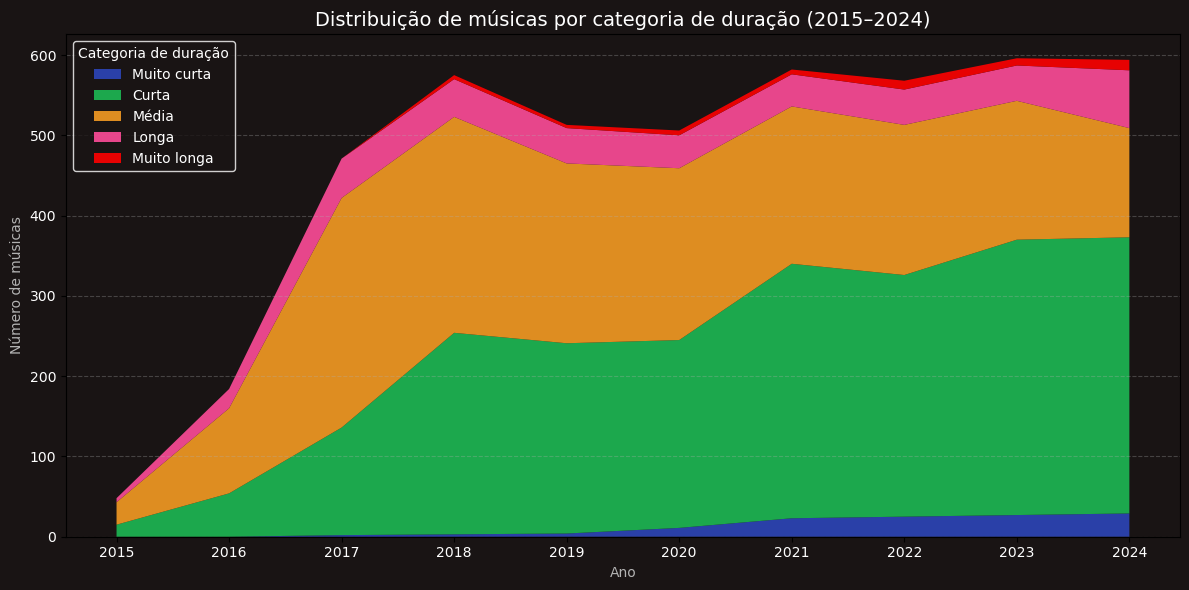

In [83]:
# Garante que o DataFrame 'contagem' já esteja construído (como no gráfico anterior)
# Se necessário, reconstrua com base no último código
# contagem = ...

# Garante a ordem das categorias
ordem = ["muito curta", "curta", "média", "longa", "muito longa"]
cores = {
    "muito curta": "#2D46B9",   # azul
    "curta": "#1DB954",         # verde
    "média": "#F59B23",         # laranja
    "longa": "#FF4C99",         # rosa
    "muito longa": "#FF0000"    # vermelho
}

# Reorganiza colunas na ordem correta
contagem = contagem[ordem]

# Gráfico de área empilhada
plt.figure(figsize=(12, 6), facecolor="#191414")
plt.stackplot(
    contagem.index,
    [contagem[c] for c in ordem],
    labels=[c.capitalize() for c in ordem],
    colors=[cores[c] for c in ordem],
    alpha=0.9
)

# Estilização
plt.title("Distribuição de músicas por categoria de duração (2015–2024)", color="white", fontsize=14)
plt.xlabel("Ano", color="#B3B3B3")
plt.ylabel("Número de músicas", color="#B3B3B3")
plt.xticks(contagem.index, color="white")
plt.yticks(color="white")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.gca().set_facecolor("#191414")

# Legenda
leg = plt.legend(title="Categoria de duração", loc="upper left", facecolor="#191414", edgecolor="white", labelcolor="white")
leg.get_title().set_color("white")

# Salvar imagem
plt.tight_layout()
plt.savefig("../outputs/area_empilhada_duracao_2015_2024.png", facecolor="#191414", dpi=300)
plt.show()


In [84]:
df.shape

(4755, 11)

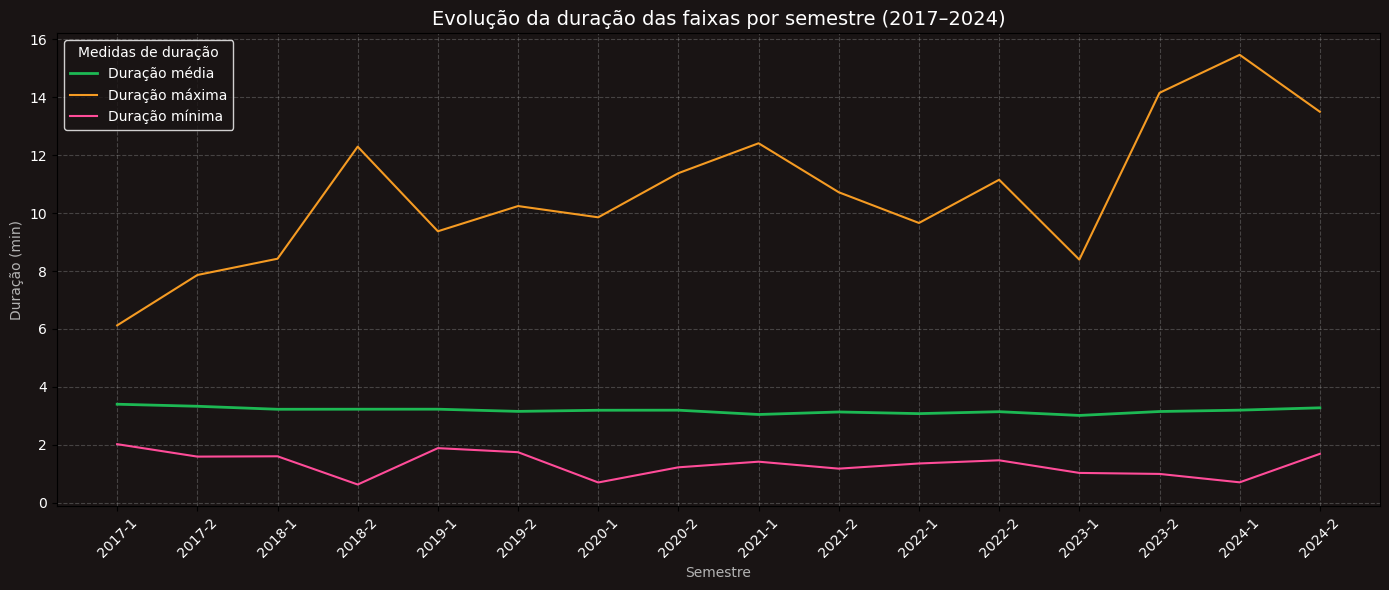

In [85]:
# ⬇️ Filtra anos desejados
df_filtrado = df.dropna(subset=["release_date", "duration_min"]).copy()
df_filtrado = df_filtrado[
    (df_filtrado["release_date"].dt.year >= 2017) &
    (df_filtrado["release_date"].dt.year <= 2024)
]

# ⬇️ Cria coluna "ano-semestre"
df_filtrado["ano_semestre"] = df_filtrado["release_date"].dt.year.astype(str) + "-" + (
    ((df_filtrado["release_date"].dt.month - 1) // 6 + 1).astype(str)
)

# ⬇️ Agrupa por semestre
df_semestres = (
    df_filtrado
    .groupby("ano_semestre")["duration_min"]
    .agg(["min", "mean", "max"])
    .sort_index()
)

# ⬇️ Gráfico de linha suavizada por semestre
plt.figure(figsize=(14, 6), facecolor="#191414")
plt.plot(df_semestres.index, df_semestres["mean"], color="#1DB954", label="Duração média", linewidth=2)
plt.plot(df_semestres.index, df_semestres["max"], color="#F59B23", label="Duração máxima", linewidth=1.5)
plt.plot(df_semestres.index, df_semestres["min"], color="#FF4C99", label="Duração mínima", linewidth=1.5)

# ⬇️ Estilo visual
plt.title("Evolução da duração das faixas por semestre (2017–2024)", color="white", fontsize=14)
plt.xlabel("Semestre", color="#B3B3B3")
plt.ylabel("Duração (min)", color="#B3B3B3")
plt.xticks(rotation=45, color="white")
plt.yticks(color="white")
plt.grid(True, linestyle="--", alpha=0.3)
plt.gca().set_facecolor("#191414")

# ⬇️ Legenda
leg = plt.legend(title="Medidas de duração", facecolor="#191414", edgecolor="white", labelcolor="white")
leg.get_title().set_color("white")

# ⬇️ Salvar na pasta correta
plt.tight_layout()
plt.savefig("../outputs/linha_duracao_por_semestre_2017_2024.png", facecolor="#191414", dpi=300)
plt.show()


In [86]:
df.shape

(4755, 11)

In [87]:
#Contagem de músicas com 10min ou mais

(df["duration_ms"] > 600000).sum()


25

In [88]:
#Contagem de músicas com 8min ou mais

(df["duration_ms"] > 480000).sum()

55

In [89]:
#Contagem de músicas com 6min ou mais

(df["duration_ms"] > 360000).sum()

104

In [90]:
# Filtrar músicas com 8 minutos ou mais
df_8min_ou_mais = (
    df[df["duration_min"] >= 8]
    .dropna(subset=["name", "artists", "duration_min"])
    .sort_values("duration_min", ascending=False)
    .head(53)
    .copy()
)

# Criar coluna formatada com nome + artista
df_8min_ou_mais["Música"] = df_8min_ou_mais["name"].str.strip().str.title() + " - " + df_8min_ou_mais["artists"].str.strip().str.title()

# Selecionar e renomear colunas
df_8min_ou_mais = df_8min_ou_mais[["Música", "duration_min", "popularity"]]
df_8min_ou_mais.columns = ["Música", "Duração (min)", "Popularidade"]

# Exibir no notebook
df_8min_ou_mais


,Música,Duração (min),Popularidade
4245,"Set Wesley Alemão 2 - Mc Paulin Da Capital, Mc...",15.466667,65
4274,Lindo Momento - Ao Vivo - Julliany Souza,14.896450,67
3801,"Poesia Acústica 14 - Pineapple Stormtv, Cesar ...",14.153833,63
4521,"Noite Carioca - Mc Ig, Mc Ryan Sp, Murillo E L...",13.500000,58
4706,"Let'S Go 5 - Mc Ig, Mc Ryan Sp, Mc Luki, Mc Ph...",13.051950,72
4502,"Poesia Acústica 16 - Pineapple Stormtv, Tz Da ...",12.626850,65
2458,"Hit Do Ano - O Peso Da Luta - Mc Hariel, Mc Do...",12.412117,60
1028,Poesia Acústica #5: Teu Popô - Remix - Pineapp...,12.295067,2
4193,"Pagodeiro, Pt. 2 - Mc Ryan Sp, Mc Davi, Mc Liv...",12.038417,60
4181,"Diz Aí Qual É O Plano? - Mc Ig, Mc Ryan Sp, Or...",11.719283,64


In [91]:
# Filtrar músicas com 1 minutos ou menos
df_1min_ou_menos = (
    df[df["duration_min"] <= 1]
    .dropna(subset=["name", "artists", "duration_min"])
    .sort_values("duration_min", ascending=False)
    .head(53)
    .copy()
)

# Criar coluna formatada com nome + artista
df_1min_ou_menos["Música"] = df_1min_ou_menos["name"].str.strip().str.title() + " - " + df_1min_ou_menos["artists"].str.strip().str.title()

# Selecionar e renomear colunas
df_1min_ou_menos = df_1min_ou_menos[["Música", "duration_min", "popularity"]]
df_1min_ou_menos.columns = ["Música", "Duração (min)", "Popularidade"]

# Exibir no notebook
df_1min_ou_menos

,Música,Duração (min),Popularidade
3877,Escândalo Íntimo - Luísa Sonza,0.993100,0
4187,Saturn Returns Interlude - Ariana Grande,0.702767,62
1937,Chromatica Ii - Lady Gaga,0.697767,54
1051,Raindrops (An Angel Cried) - Ariana Grande,0.627333,60


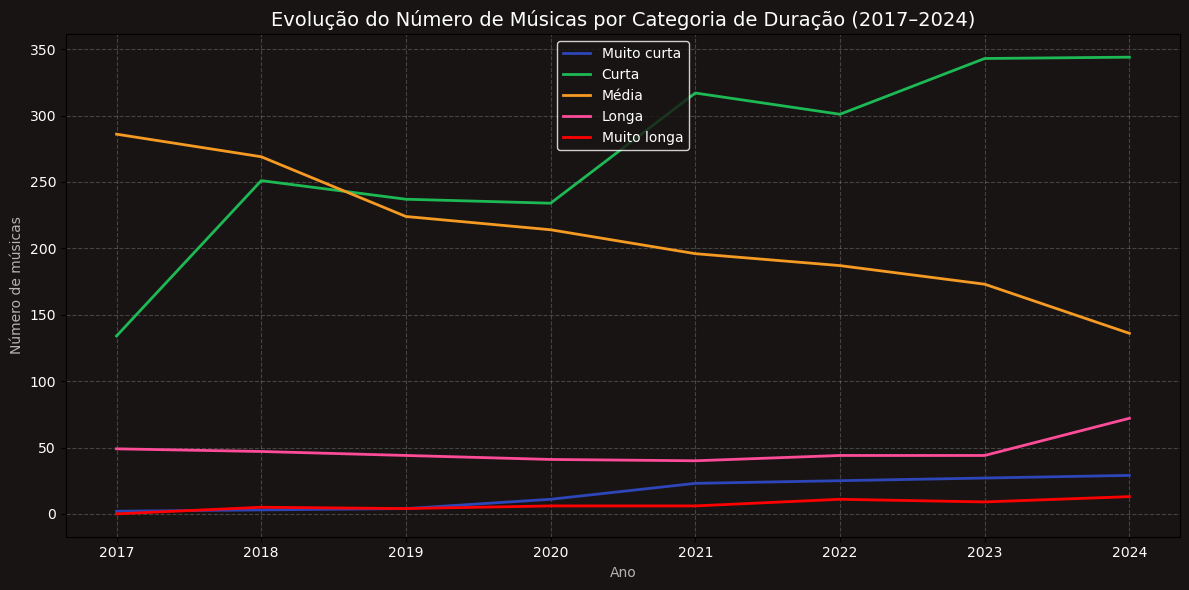

In [92]:
# Filtra período entre 2017 e 2024
df_filtrado = df.dropna(subset=["release_year", "categoria_duracao"]).copy()
df_filtrado = df_filtrado[
    (df_filtrado["release_year"] >= 2017) &
    (df_filtrado["release_year"] <= 2024)
]

# Conta número de músicas por ano e categoria (absoluto)
contagem = df_filtrado.groupby(["release_year", "categoria_duracao"]).size().unstack(fill_value=0)

# Cores por categoria
cores_categoria = {
    "muito curta": "#2D46B9",   # azul
    "curta": "#1DB954",         # verde
    "média": "#F59B23",         # laranja
    "longa": "#FF4C99",         # rosa
    "muito longa": "#FF0000"    # vermelho
}

# Cria gráfico
plt.figure(figsize=(12, 6), facecolor="#191414")
for categoria in ["muito curta", "curta", "média", "longa", "muito longa"]:
    if categoria in contagem.columns:
        plt.plot(
            contagem.index,
            contagem[categoria],
            label=categoria.capitalize(),
            linewidth=2,
            color=cores_categoria[categoria]
        )

# Estilização
plt.title("Evolução do Número de Músicas por Categoria de Duração (2017–2024)", color="white", fontsize=14)
plt.xlabel("Ano", color="#B3B3B3")
plt.ylabel("Número de músicas", color="#B3B3B3")
plt.xticks(contagem.index, color="white")
plt.yticks(color="white")
plt.grid(True, linestyle="--", alpha=0.3)
plt.gca().set_facecolor("#191414")
plt.legend(facecolor="#191414", edgecolor="white", labelcolor="white")

# Garante que a pasta exista
os.makedirs("C:/Users/Lucas/Documents/Coding/spotify_replay_trends_final/outputs", exist_ok=True)

# Salva a imagem
plt.tight_layout()
plt.savefig("../outputs/linhas_absolutas_categorias_duracao_por_ano.png", facecolor="#191414", dpi=300)
plt.show()


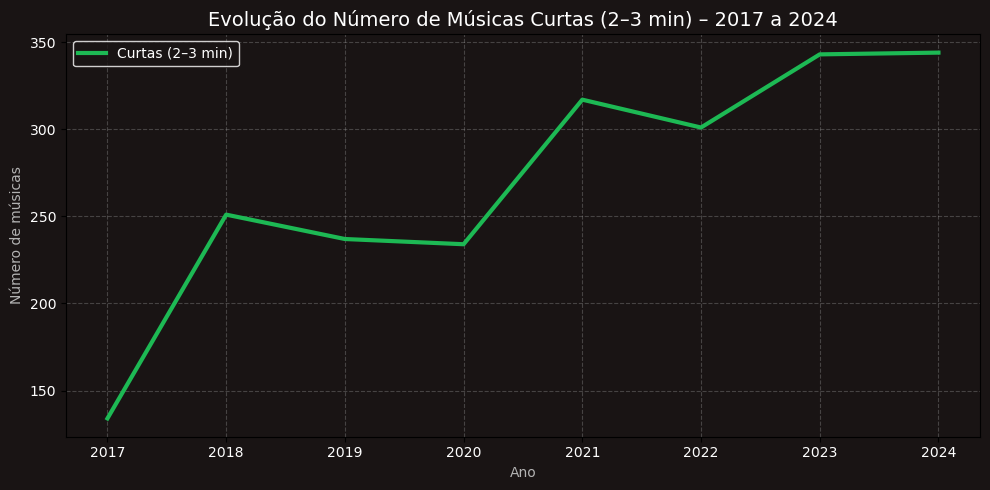

In [93]:
# Filtra anos e categoria
df_curta = df[
    (df["release_year"] >= 2017) &
    (df["release_year"] <= 2024) &
    (df["categoria_duracao"] == "curta")
].copy()

# Conta faixas curtas por ano
contagem_curta = df_curta.groupby("release_year").size()

# Gráfico
plt.figure(figsize=(10, 5), facecolor="#191414")
plt.plot(
    contagem_curta.index,
    contagem_curta.values,
    color="#1DB954",
    linewidth=3,
    label="Curtas (2–3 min)"
)

# Estilo
plt.title("Evolução do Número de Músicas Curtas (2–3 min) – 2017 a 2024", color="white", fontsize=14)
plt.xlabel("Ano", color="#B3B3B3")
plt.ylabel("Número de músicas", color="#B3B3B3")
plt.xticks(contagem_curta.index, color="white")
plt.yticks(color="white")
plt.grid(True, linestyle="--", alpha=0.3)
plt.gca().set_facecolor("#191414")
plt.legend(facecolor="#191414", edgecolor="white", labelcolor="white")

# Garante que a pasta exista
os.makedirs("C:/Users/Lucas/Documents/Coding/spotify_replay_trends_final/outputs", exist_ok=True)

# Salva
plt.tight_layout()
plt.savefig("../outputs/linha_curtas_2017_2024.png", facecolor="#191414", dpi=300)
plt.show()


In [104]:
df.shape

(4755, 11)